This notebook demonstrates how to plot total effective areas for various detector configurations

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from gen2_analysis import factory, plotting

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
factory.set_kwargs(psi_bins={k: [0, np.pi] for k in ('tracks', 'cascades', 'radio')})

In [3]:
radio_aeff = factory.get('Gen2-Radio')['radio_events'][0]
gen2_aeff = factory.get('Gen2-InIce')['cascades'][0]
ic_aeff = factory.get('IceCube')['cascades'][0]

/Users/jakob/Documents/IceCube/projects/2021/gen2-analysis/gen2_analysis/effective_areas.py:1067: RuntimeWarning: divide by zero encountered in log
  np.log(veff),
/opt/homebrew/Caskroom/miniforge/base/envs/gen2-analysis/lib/python3.9/site-packages/dashi/histogram.py:144: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._h_bincontent[self._h_visiblerange]
/Users/jakob/Documents/IceCube/projects/2021/gen2-analysis/gen2_analysis/effective_areas.py:271: RuntimeWarning: divide by zero encountered in log10
  y = numpy.where(~(h.bincontent <= 0), numpy.log10(h.bincontent), -numpy.inf)
/Users/jakob/Documents/IceCube/projects/2021/gen2-analysis/gen2_analysis/effective_areas.py:834: UserWarning: Reconstruction quantities are made up for now
  warnings.warn("Reco

Text(1573733309.710493, 38.54309999288652, 'IceCube starting events')

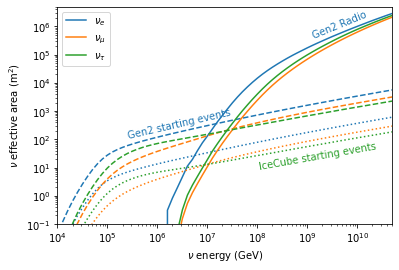

In [4]:
cos_theta = radio_aeff.bin_edges[radio_aeff.dimensions.index('true_zenith_band')-1]
flavors = ['${}$' .format([r'\nu', r'\overline{\nu}'][i % 2] + '_{' + ['e', r'\mu', r'\tau'][i//2] +'}') for i in range(6)]
ax = plt.gca()
for i in range(0,6,2):
    line = ax.loglog(radio_aeff.bin_edges[0][1:], radio_aeff.values[i,...].mean(axis=1).sum(axis=(1,2)))[0]
    line.set_label(flavors[i])
    line = ax.loglog(gen2_aeff.bin_edges[0][1:], gen2_aeff.values[i,...].mean(axis=1).sum(axis=(1,2)), color=line.get_color(), ls='--')[0]
    line = ax.loglog(ic_aeff.bin_edges[0][1:], ic_aeff.values[i,...].mean(axis=1).sum(axis=(1,2)), color=line.get_color(), ls=':')[0]
    
ax.set_ylabel(r'$\nu$ effective area (m$^2$)')
ax.set_xlabel(r'$\nu$ energy (GeV)')
ax.set_xlim(1e4, 5e10)
ax.set_ylim(1e-1, 5e6)

ax.legend()

plotting.label_curve(ax, ax.lines[0], x=5e9, offset=5, label='Gen2 Radio')
plotting.label_curve(ax, ax.lines[1], x=3e6, offset=5, label='Gen2 starting events')
plotting.label_curve(ax, ax.lines[8], x=1.5e9, offset=-6, va='top', label='IceCube starting events')